In [1]:
import os
import sys
import importlib
from pathlib import Path
from itertools import product
import h5py

import gym
import numpy as np
import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.transform
import torch as th
import torch.nn as nn

from tqdm.auto import tqdm

from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.vec_env import VecEnvWrapper, VecEnv, DummyVecEnv, VecFrameStack
from stable_baselines3.common.vec_env import VecTransposeImage
from stable_baselines3.common.cmd_util import make_atari_env

sys.path.insert(1, "../rl-baselines3-zoo")
import utils.import_envs  # noqa: F401 pylint: disable=unused-import
from utils.utils import StoreDict
from utils import ALGOS, create_test_env, get_latest_run_id, get_saved_hyperparams

from interp.common.wrappers import BlurAtariScore, RemoveAtariScore

/home/eric/Code/miniconda3/envs/interp/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eric/Code/miniconda3/envs/interp/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eric/Code/miniconda3/envs/interp/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eric/Co

In [2]:
########### Set Device ############
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
dtype = th.float32
th.set_default_dtype(dtype)
print("Using device: {}".format(device))

Using device: cuda


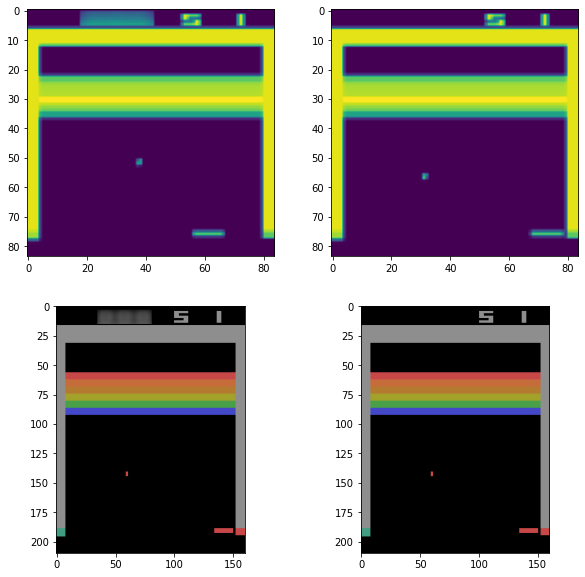

In [3]:
env = make_atari_env('BreakoutNoFrameskip-v4')
benv = BlurAtariScore(env)
renv = RemoveAtariScore(env)
obs = benv.reset()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(obs[0, :, :, 0])
obs = renv.reset()
plt.subplot(2, 2, 2)
plt.imshow(obs[0, :, :, 0])
frame = benv.render(mode='rgb_array')
plt.subplot(2, 2, 3)
plt.imshow(frame)
frame = renv.render(mode='rgb_array')
plt.subplot(2, 2, 4)
plt.imshow(frame)

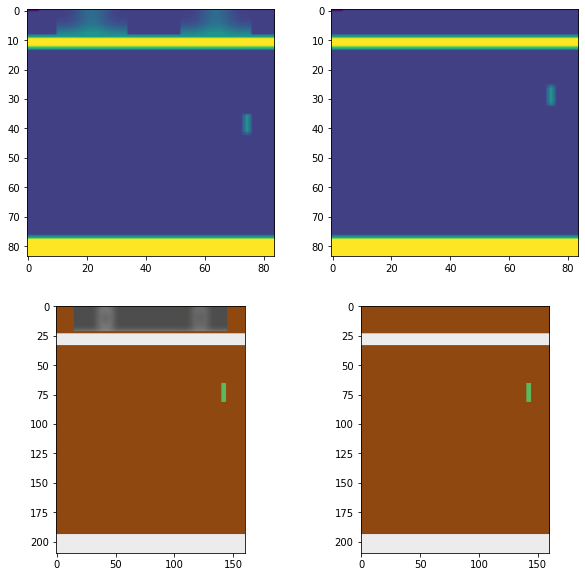

In [4]:
env = make_atari_env('PongNoFrameskip-v4')
benv = BlurAtariScore(env)
renv = RemoveAtariScore(env)
obs = benv.reset()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(obs[0, :, :, 0])
obs = renv.reset()
plt.subplot(2, 2, 2)
plt.imshow(obs[0, :, :, 0])
frame = benv.render(mode='rgb_array')
plt.subplot(2, 2, 3)
plt.imshow(frame)
frame = renv.render(mode='rgb_array')
plt.subplot(2, 2, 4)
plt.imshow(frame)

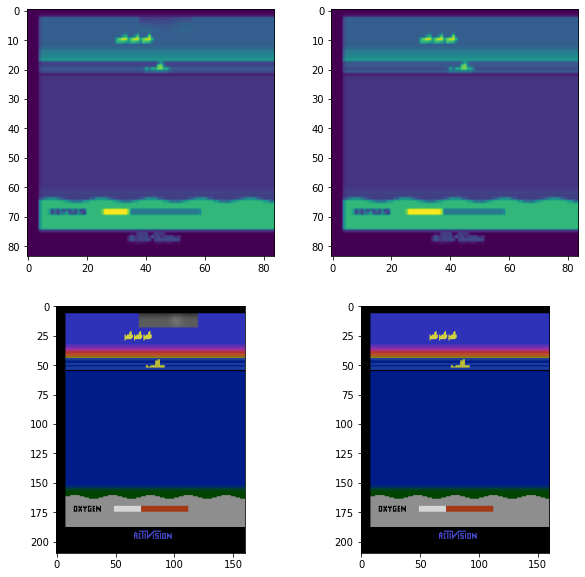

In [6]:
env = make_atari_env('SeaquestNoFrameskip-v4')
benv = BlurAtariScore(env)
renv = RemoveAtariScore(env)
obs = benv.reset()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(obs[0, :, :, 0])
obs = renv.reset()
plt.subplot(2, 2, 2)
plt.imshow(obs[0, :, :, 0])
frame = benv.render(mode='rgb_array')
plt.subplot(2, 2, 3)
plt.imshow(frame)
frame = renv.render(mode='rgb_array')
plt.subplot(2, 2, 4)
plt.imshow(frame)

In [ ]:
env = make_atari_env('SpaceInvadersNoFrameskip-v4')
benv = BlurAtariScore(env)
renv = RemoveAtariScore(env)
obs = benv.reset()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(obs[0, :, :, 0])
obs = renv.reset()
plt.subplot(2, 2, 2)
plt.imshow(obs[0, :, :, 0])
frame = benv.render(mode='rgb_array')
plt.subplot(2, 2, 3)
plt.imshow(frame)
frame = renv.render(mode='rgb_array')
plt.subplot(2, 2, 4)
plt.imshow(frame)

In [ ]:
env = make_atari_env('SpaceInvadersNoFrameskip-v4')
env = VecFrameStack(env, n_stack=4)
benv = BlurAtariScore(env)
renv = RemoveAtariScore(env)
obs = benv.reset()
plt.figure(figsize=(10, 5))
for k in range(4):
    plt.subplot(2, 4, k+1)
    plt.imshow(obs[0, :, :, k])
obs = renv.reset()
for k in range(4):
    plt.subplot(2, 4, 4+k+1)
    plt.imshow(obs[0, :, :, k])

In [ ]:
env = make_atari_env('TennisNoFrameskip-v4')
benv = BlurAtariScore(env)
renv = RemoveAtariScore(env)
obs = benv.reset()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(obs[0, :, :, 0])
obs = renv.reset()
plt.subplot(2, 2, 2)
plt.imshow(obs[0, :, :, 0])
frame = benv.render(mode='rgb_array')
plt.subplot(2, 2, 3)
plt.imshow(frame)
frame = renv.render(mode='rgb_array')
plt.subplot(2, 2, 4)
plt.imshow(frame)